In [ ]:
pip install --upgrade accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import pipeline

modelo = 'facebook/bart-large-mnli'
modelo = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'

classifier = pipeline("zero-shot-classification",model=modelo)

In [ ]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']

classifier(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'cooking', 'dancing'],
 'scores': [0.7955101728439331, 0.1074768602848053, 0.09701291471719742]}

In [ ]:
sequence_to_classify = "que es una opcion de compra o call?"


candidate_labels = ["Es un contrato que te da derecho aunque no obligacion de comprar una accion a un determinado valor",
"La propiedad sobre una sociedad anónima y constituye un reclamo sobre parte de sus activos",
"Una técnica de cocina que implica sumergir rápidamente alimentos en agua hirviendo y luego enfriarlos",
"Un ritual tradicional en el que se baila alrededor de un sombrero durante la luna llena",
"La acción de tejer bufandas de colores para canguros en climas fríos del sudeste asiatico",]


classifier(sequence_to_classify, candidate_labels)

{'sequence': 'que es una opcion de compra o call?',
 'labels': ['Es un contrato que te da derecho aunque no obligacion de comprar una accion a un determinado valor',
  'La acción de tejer bufandas de colores para canguros en climas fríos del sudeste asiatico',
  'La propiedad sobre una sociedad anónima y constituye un reclamo sobre parte de sus activos',
  'Un ritual tradicional en el que se baila alrededor de un sombrero durante la luna llena',
  'Una técnica de cocina que implica sumergir rápidamente alimentos en agua hirviendo y luego enfriarlos'],
 'scores': [0.7896430492401123,
  0.07858537882566452,
  0.07808096706867218,
  0.03464050590991974,
  0.01905008964240551]}

# Sentence Similarity

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=1685fa0a11e4af3e94f45acdf1fde79c29cd615f8a380e6d41c6209af2a95181
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
%%time
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

CPU times: user 3.66 s, sys: 1.86 s, total: 5.52 s
Wall time: 18 s


In [ ]:
%%time
words = ['hombre','mujer','rey','reina','naranja','manzana','perro','ratón','veterinario']
sentences = [['Represent the sentence: ',word] for word in words]

embeddings = model.encode(sentences)
similarities = cosine_similarity(embeddings,embeddings)

# similarities = embeddings.dot(embeddings.T)  # producto escalar en lugar de CS

len(embeddings[0])

CPU times: user 284 ms, sys: 2.53 ms, total: 286 ms
Wall time: 393 ms


512

27.267738


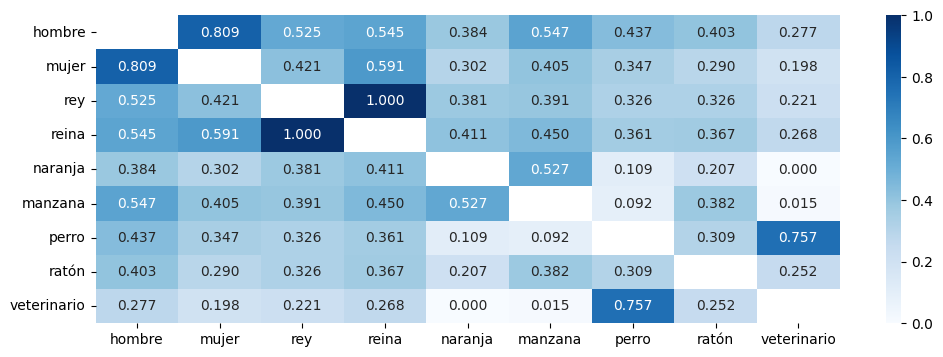

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(similarities, index=words, columns=words)
df = df.where(df <= 0.999, np.nan)

df = (df-df.min().min())/(df.max().max()-df.min().min()) # escala 0 a 1

fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(df, cmap='Blues', annot=True, fmt=".3f", ax=ax)
print(df.sum().sum())
plt.show()

In [ ]:
query = "que es una opcion de compra o call?"
query_embedding = model.encode(query)


candidate_labels = ["Es un contrato que te da derecho aunque no obligacion de comprar una accion a un determinado valor",
"La propiedad sobre una sociedad anónima y constituye un reclamo sobre parte de sus activos",
"Una técnica de cocina que implica sumergir rápidamente alimentos en agua hirviendo y luego enfriarlos",
"Un ritual tradicional en el que se baila alrededor de un sombrero durante la luna llena",
"La acción de tejer bufandas de colores para canguros en climas fríos del sudeste asiatico",]

candidates = [['Represent the sentence: ',x] for x in candidate_labels]
candidates_embedding = model.encode(candidates)


dot_products = [query_embedding.dot(x) for x in candidates_embedding]
dot_products / sum(dot_products)

array([0.60517174, 0.1911592 , 0.09484375, 0.04498139, 0.06384388],
      dtype=float32)